In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from ase.io.extxyz import read_xyz
import numpy as np
from ase.atoms import Atoms
from ase.io.formats import index2range
from io import StringIO, UnsupportedOperation
from mtp import *
import os
from matplotlib import pyplot as plt

In [1]:
ile = '/home/joe/mlip_test/gp_iter6_liqamo_lp.xyz'
db = list(read_xyz(file, index=slice(0,None)))
my = list(read_xyz('/home/joe/Documents/Ge_od/Potentials/Si_myDB_216/train_64_125_216_full.xyz', index=slice(0,None)))
Ge = list(read_xyz('/home/joe/Documents/Ge_od/Potentials/hp_liquid/hpliq_amoliq/hpliq_amoliq_train.xyz', index=slice(0,None)))

NameError: name 'read_xyz' is not defined

In [28]:
with open('/home/joe/Documents/Ge_od/Potentials/Si_myDB_216/train_64_125_216.xyz') as f:
    my_80_train = list(read_xyz(f, index=slice(0,None)))
with open('/home/joe/Documents/Ge_od/Potentials/Si_myDB_216/validate_64_125_216.xyz') as f:
    my_80_val = list(read_xyz(f, index=slice(0,None)))

In [26]:
with open('/home/joe/Documents/Ge_od/Potentials/Si_myDB_216/train_64_125_216.cfg', 'w+') as f:
    write_cfg_db(f, my_80_train, force_name='dft_forces')

In [29]:
with open('/home/joe/Documents/Ge_od/Potentials/Si_myDB_216/validate_64_125_216.cfg', 'w+') as f:
    write_cfg_db(f, my_80_val, force_name='dft_forces')

To do:
* calculator implementation
* could then think about contributing this to ase

In [45]:
ats = list(read_cfg_db('test_12_structures.cfg', energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))

In [44]:
os.chdir('/home/joe/Documents/Ge_od/Potentials/Si_myDB_supercrystals/MTP')
os.listdir()

['run_1000_Si_myDB_liqamocryst_train_24_rb_8',
 'Sq_MTP__26_rb_8',
 'MTP',
 'test_12_structures.cfg',
 'run_1000_Si_myDB_liqamocryst_train_24_rb_12',
 'test_12_rb_4.cfg',
 'log1.out',
 'Si_myDB_liqamocryst_train_12_sf_0.2.mtp',
 'run_1000_22_rb_8',
 'test_12_sf_0.5.cfg',
 'run_1000_Si_myDB_liqamocryst_train_06',
 'slurm-2467737.out',
 'test_12.cfg',
 'test_14.cfg',
 'train_mtp.sh',
 'Si_myDB_liqamocryst_train_08.mtp',
 'test_08.cfg',
 'Si_myDB_liqamocryst_train_26_rb_12.mtp',
 'slurm-2467744.out',
 'slurm-2467739.out',
 'test_12_mindist_1.2.cfg',
 'Sq_MTP__22_rb_8',
 'Si_myDB_liqamocryst_train_10.mtp',
 'run_1000_Si_myDB_liqamocryst_train_04',
 'run_1000_26_rb_8',
 'Si_myDB_liqamocryst_train_12_rb_12.mtp',
 'slurm-2467742.out',
 'Si_myDB_liqamocryst_train_06.mtp',
 'run_1000_Si_myDB_liqamocryst_train_12',
 'test_12_sf_0.1.cfg',
 'Si_myDB_liqamocryst_train_24.mtp',
 'test_12_rb_12.cfg',
 'run_1000_Si_myDB_liqamocryst_train_10',
 'Si_myDB_liqamocryst_train_12_rb_10.mtp',
 'init.mtp',
 'S

In [6]:
# test_04 = list(read_cfg_db('test_04.cfg', Type_Ar_map={0:14},
#                            energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_06 = list(read_cfg_db('test_06.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_08 = list(read_cfg_db('test_08.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_10 = list(read_cfg_db('test_10.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12 = list(read_cfg_db('test_12.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_14 = list(read_cfg_db('test_14.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
ref = list(read_cfg_db('Si_myDB_liqamocryst_validate.cfg', Type_Ar_map={0:14}))


Above explores the use of different 'untrained_potentials' from the mlip-2 set (need to understand what this is)

Below explores changing other hypers, using the 012.mtp (and rb=8 as above) unless specified (found to be best in initial tests):
* rb is the number of radial basis functions in init.mtp
* sf is --scale-by-force==(0.1, 0.2, 0.5), for scaling the weight of configurations depending on their closeness to
equilibrium

In [43]:
test_12_rb_4 = list(read_cfg_db('test_12_rb_4.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12_rb_6 = list(read_cfg_db('test_12_rb_6.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12_rb_10 = list(read_cfg_db('test_12_rb_10.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12_rb_12 = list(read_cfg_db('test_12_rb_12.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12_sf_01 = list(read_cfg_db('test_12_sf_0.1.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12_sf_02 = list(read_cfg_db('test_12_sf_0.2.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12_sf_05 = list(read_cfg_db('test_12_sf_0.5.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))
test_12_mindist_12 = list(read_cfg_db('test_12_mindist_1.2.cfg', Type_Ar_map={0:14},
                           energy_label='MTP_energy', force_label='MTP_force', stress_label='MTP_stress'))

In [44]:
labels = [#['04',
          '06', '08', '10', '12', '14']

labels_2 = [#['04',
          'rb_4', 'rb_6', 'rb_10', 'rb_12', 'sf_0.1', 'sf_0.2', 'sf_0.5', 'mindist_1.2']

In [51]:
tests = [
    #test_04,
    test_06, test_08, test_10, test_12, test_14]
tests_2 = [test_12_rb_4, test_12_rb_6, test_12_rb_10, test_12_rb_12,
           test_12_sf_01, test_12_sf_02, test_12_sf_05, test_12_mindist_12]
dat = [[], [], []]
dat_2 = [[], [], []]
for i in tests:
    zero = i[0].info['MTP_energy']
    for j in dat:
        j.append([])
    for j in i:
        dat[0][-1].append(j.info['MTP_energy']/len(j) - zero)
        dat[1][-1].extend(np.linalg.norm(j.arrays['MTP_force'], axis=0).flatten())
        dat[2][-1].extend(j.info['MTP_stress'].flatten())

for i in tests_2:
    zero = i[0].info['MTP_energy']
    for j in dat_2:
        j.append([])
    for j in i:
        dat_2[0][-1].append(j.info['MTP_energy']/len(j) - zero)
        dat_2[1][-1].extend(np.linalg.norm(j.arrays['MTP_force'], axis=0).flatten())
        dat_2[2][-1].extend(j.info['MTP_stress'].flatten())

In [46]:
zero = ref[0].info['dft_energy']
ref_dat = [[], [], []]
for j in ref:
    ref_dat[0].append(j.info['dft_energy']/len(j) - zero)
    ref_dat[1].extend(np.linalg.norm(j.arrays['dft_force'], axis=0).flatten())
    ref_dat[2].extend(j.info['dft_virial'].flatten())


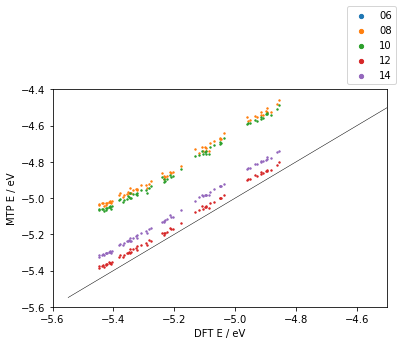

In [47]:
fig, ax = plt.subplots()
for i in range(len(tests)):
    ax.scatter(ref_dat[0], dat[0][i], label=labels[i], s=2)
ax.plot(x := [min(ref_dat[0]) - 0.1, max(ref_dat[0]) + 0.1], x, color='k', linewidth=0.5)
ax.set(xlim=(-5.6,-4.5),
       #ylim=(-5.6,-3),
       ylim=(-5.6,-4.4),
       xlabel='DFT E / eV', ylabel='MTP E / eV')
ax.legend(bbox_to_anchor=(1.04, 1.0), markerscale=3)

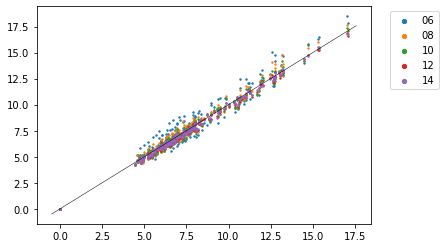

In [48]:
fig, ax = plt.subplots()
for i in range(len(tests)):
    ax.scatter(ref_dat[1], dat[1][i], label=labels[i], s=2)
ax.plot(x := [min(ref_dat[1]) - 0.5, max(ref_dat[1]) + 0.5], x, color='k', linewidth=0.5)
# ax.set(xlim=(-6,-4.5))
ax.legend(bbox_to_anchor=(1.04, 1.0), markerscale=3)

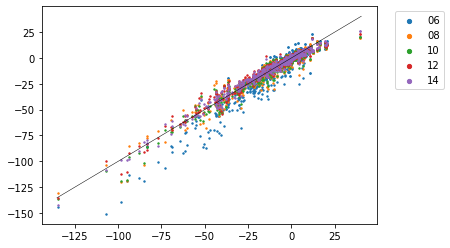

In [49]:
fig, ax = plt.subplots()
for i in range(len(tests)):
    ax.scatter(ref_dat[2], dat[2][i], label=labels[i], s=2)
ax.plot(x := [min(ref_dat[2]) - 0.5, max(ref_dat[2]) + 0.5], x, color='k', linewidth=0.5)
# ax.set(xlim=(-6,-4.5))
ax.legend(bbox_to_anchor=(1.04, 1.0), markerscale=3)

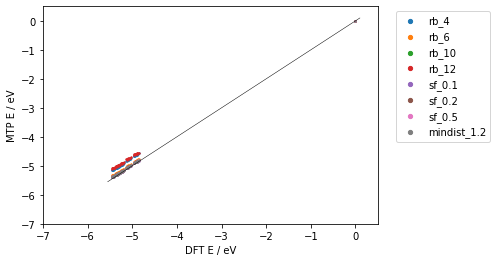

In [68]:
fig, ax = plt.subplots()
for i in range(len(tests_2)):
    ax.scatter(ref_dat[0], dat_2[0][i], label=labels_2[i], s=2)
ax.plot(x := [min(ref_dat[0]) - 0.1, max(ref_dat[0]) + 0.1], x, color='k', linewidth=0.5)
# ax.set(xlim=(-5.6,-4.5),
ax.set(xlim=(-7,0.5),
       ylim=(-7,0.5),
       # ylim=(-5.6,-4.4),
       xlabel='DFT E / eV', ylabel='MTP E / eV')
ax.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0), markerscale=3)

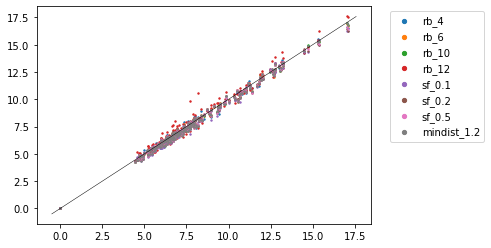

In [53]:
fig, ax = plt.subplots()
for i in range(len(tests_2)):
    ax.scatter(ref_dat[1], dat_2[1][i], label=labels_2[i], s=2)
ax.plot(x := [min(ref_dat[1]) - 0.5, max(ref_dat[1]) + 0.5], x, color='k', linewidth=0.5)
# ax.set(xlim=(-6,-4.5))
ax.legend(bbox_to_anchor=(1.04, 1.0), markerscale=3)

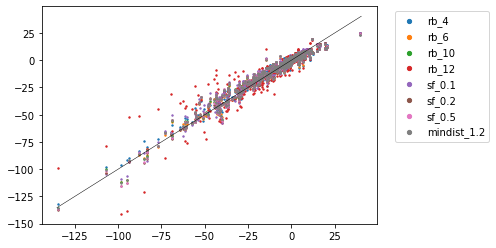

In [55]:
fig, ax = plt.subplots()
for i in range(len(tests_2)):
    ax.scatter(ref_dat[2], dat_2[2][i], label=labels_2[i], s=2)
ax.plot(x := [min(ref_dat[2]) - 0.5, max(ref_dat[2]) + 0.5], x, color='k', linewidth=0.5)
# ax.set(xlim=(-6,-4.5))
ax.legend(loc='upper left', bbox_to_anchor=(1.04, 1.0), markerscale=3)

In [40]:
def calc_RMSE(dat, ref):

    rmses = [ [[] for i in range(len(j))] for j in dat]

    for i in range(len(dat)):
        for j in range(len(dat[i])):
            rmses[i][j].append( np.sqrt(((np.array(dat[i][j]) - np.array(ref_dat[i]))**2).mean()) )

    return rmses


In [36]:
calc_RMSE(dat, ref)

[[[], [], [], [], []], [[], [], [], [], []], [[], [], [], [], []]]


[[[2.0331491475929973],
  [0.37658997116886084],
  [0.3524441002045977],
  [0.051056915385401934],
  [0.11470655109473109]],
 [[0.7674185677233254],
  [0.449965578733021],
  [0.3540529708587838],
  [0.25544884931477396],
  [0.21589229975013388]],
 [[9.331400347584445],
  [5.368291826879886],
  [4.515615008219421],
  [4.066737394192009],
  [3.360283351698521]]]

In [37]:
print(labels)


['06', '08', '10', '12', '14']


In [41]:
calc_RMSE(dat_2, ref)

[[[0.04886489055067283],
  [0.04876302055831905],
  [0.04899310612403095],
  [0.047951801927671275],
  [0.04149733701664958],
  [0.057874303140807576],
  [0.05109433544472493]],
 [[0.2556736142006959],
  [0.25610427319628554],
  [0.25732890487437166],
  [0.25684456406336725],
  [0.3054690395717579],
  [0.24988826365264968],
  [0.24951774245651215]],
 [[4.0738248229391365],
  [4.06711038092277],
  [4.039589677886528],
  [4.059675789633806],
  [4.374158998331222],
  [4.104060874976878],
  [4.072534521867647]]]

In [5]:
from ase.io.castep import read_castep_castep

In [6]:
from mtp import write_cfg_db, read_cfg_db

In [57]:
DFT_struct = []
DFT_dir = '/home/joe/Documents/Ge_od/Structure_databases/crystals/Si_MP_dense_cryst'
for i in os.listdir(DFT_dir):
    if '.castep' in i:
        DFT_struct.append(read_castep_castep(os.path.join(DFT_dir, i))[0])
        DFT_struct[-1].info['energy'] = DFT_struct[-1].calc.get_total_energy_corrected()

In [58]:
mtp = MTP('/home/joe/Documents/Ge_od/Potentials/Si_myDB_supercrystals/MTP/Si_myDB_liqamocryst_train_24_rb_12.mtp',
          train='/home/joe/Documents/Ge_od/Potentials/Si_myDB_supercrystals/MTP/Si_myDB_liqamocryst_train.cfg')

In [9]:
DFT_struct[0].calc = mtp

In [341]:
DFT_struct[4].get_stress(voigt=False)

array([[ 0.01847787, -0.00094722, -0.00067236],
       [-0.00094722,  0.01847787, -0.00067236],
       [-0.00067236, -0.00067236,  0.00935469]])

In [342]:
DFT_struct[4].get_forces()

array([[-0.00138,  0.00138,  0.     ],
       [ 0.00138, -0.00138, -0.     ]])

In [27]:
import time

In [48]:
s = time.time()
mtp.calculate(DFT_struct[1], properties=['grade'],
              timeout=60)
f = time.time()
f-s

30.05262064933777

In [ ]:
s = time.time()
o = mtp.calc_grade_bulk(DFT_struct)
f = time.time()
f-s

In [ ]:
DFT_struct[0].info


In [344]:
from quippy.potential import Potential

In [348]:
hasattr(Potential, 'calculate')

True

In [349]:
hasattr(MTP, 'calculate')


True